In [34]:
# load joints.json
# joint_names = data['joint_names'] # 159个关节名
    #     ["body_world", "b_root", "b_spine0", "b_spine1", "b_spine2", "b_spine3", "b_neck0", "p_neck_twist0", "p_neck_twist1", "b_head", "b_head_null", "b_jaw", "b_teeth", "b_tongue0", "b_tongue1", "b_tongue2", "b_tongue3", "b_tongue4", "b_l_tongue4_1", "b_l_tongue4_2", "b_r_tongue4_1", "b_r_tongue4_2", "b_l_tongue3_1", "b_l_tongue3_2", "b_r_tongue3_1", "b_r_tongue3_2", "b_l_tongue2_1", "b_l_tongue2_2", "b_r_tongue2_1", "b_r_tongue2_2", "b_r_tongue1_1", "b_r_tongue1_2", "b_l_tongue1_1", "b_l_tongue1_2", "b_jaw_null", "b_l_eye", "b_l_eye_null", "b_r_eye", "b_r_eye_null", "b_l_shoulder", "p_l_scap", "b_l_arm", "p_l_arm_twist4", "p_l_arm_twist3", "p_l_arm_twist2", "p_l_arm_twist1", "p_l_arm_twist0", "b_l_forearm", "p_l_forearm_twist0", "p_l_forearm_twist1", "p_l_forearm_twist2", "p_l_forearm_twist3", "p_l_forearm_twist4", "b_l_wrist_twist", "b_l_wrist", "b_l_index1", "b_l_index2", "b_l_index3", "b_l_index_null", "b_l_ring1", "b_l_ring2", "b_l_ring3", "b_l_ring_null", "b_l_middle1", "b_l_middle2", "b_l_middle3", "b_l_middle_null", "b_l_pinky1", "b_l_pinky2", "b_l_pinky3", "b_l_pinky_null", "b_l_thumb0", "b_l_thumb1", "b_l_thumb2", "b_l_thumb3", "b_l_thumb_null", "p_l_delt", "b_r_shoulder", "p_r_scap", "b_r_arm", "p_r_arm_twist4", "p_r_arm_twist3", "p_r_arm_twist2", "p_r_arm_twist1", "p_r_arm_twist0", "b_r_forearm", "p_r_forearm_twist0", "p_r_forearm_twist1", "p_r_forearm_twist2", "p_r_forearm_twist3", "p_r_forearm_twist4", "b_r_wrist_twist", "b_r_wrist", "b_r_index1", "b_r_index2", "b_r_index3", "b_r_index_null", "b_r_ring1", "b_r_ring2", "b_r_ring3", "b_r_ring_null", "b_r_middle1", "b_r_middle2", "b_r_middle3", "b_r_middle_null", "b_r_pinky1", "b_r_pinky2", "b_r_pinky3", "b_r_pinky_null", "b_r_thumb0", "b_r_thumb1", "b_r_thumb2", "b_r_thumb3", "b_r_thumb_null", "p_r_delt", "p_sternum", "p_navel", "b_l_upleg", "b_l_leg", "p_l_leg_twist0", "p_l_leg_twist1", "p_l_leg_twist2", "p_l_leg_twist3", "p_l_leg_twist4", "b_l_foot_twist", "b_l_foot", "b_l_talocrural", "b_l_subtalar", "b_l_transversetarsal", "b_l_ball", "p_l_upleg_twist0", "p_l_upleg_twist1", "p_l_upleg_twist2", "p_l_upleg_twist3", "p_l_upleg_twist4", "p_pelvis", "p_pelvis_null", "p_r_rect", "p_l_glut", "p_l_rect", "p_r_glut", "b_r_upleg", "b_r_leg", "p_r_leg_twist0", "p_r_leg_twist1", "p_r_leg_twist2", "p_r_leg_twist3", "p_r_leg_twist4", "b_r_foot_twist", "b_r_foot", "b_r_talocrural", "b_r_subtalar", "b_r_transversetarsal", "b_r_ball", "p_r_upleg_twist0", "p_r_upleg_twist1", "p_r_upleg_twist2", "p_r_upleg_twist3", "p_r_upleg_twist4"], 
# joint_parents = data['joint_parents'] # 159个关节的父节点
# joint_rotations = data['joint_rotation'] # 159个关节的初始旋转角度四元数
# joint_offset = data['joint_offset'] # 159个关节的初始位置
import json

with open('joints.json') as f:
    data = json.load(f)

joint_names = data['joint_names']
joint_parents = data['joint_parents']
joint_rotations = data['joint_rotation']
joint_offset = data['joint_offset']
# 打印长度
print(len(joint_names))
print(len(joint_parents))
print(len(joint_rotations))
print(len(joint_offset))


159
159
159
159


# show bones

(720, 159, 8)


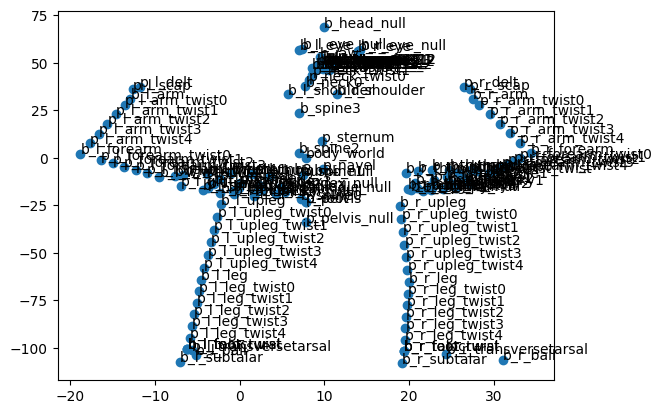

In [35]:

# 读取 body_motion_0.npy
import numpy as np
body_motion_0 = np.load('body_motions_0.npy')
print(body_motion_0.shape)
# (480, 159, 8) 480帧，159个关节，每个关节8个值 (x,y,z,rx,ry,rz,rw,scale)
import matplotlib.pyplot as plt

# 画出第0帧的关节，带上关节名字
plt.figure()
plt.scatter(body_motion_0[0,:,0], body_motion_0[0,:,1])
for i in range(159):
    plt.text(body_motion_0[0,i,0], body_motion_0[0,i,1], joint_names[i])

plt.show()

# 转换成 smpl



In [36]:
from enum import Enum


# 3D Space
class Bone(str, Enum):
    """All 55 HumanBodyBones from Unity."""

    HIPS = "Hips"
    LEFT_UPPER_LEG = "LeftUpperLeg"
    RIGHT_UPPER_LEG = "RightUpperLeg"
    LEFT_LOWER_LEG = "LeftLowerLeg"
    RIGHT_LOWER_LEG = "RightLowerLeg"
    LEFT_FOOT = "LeftFoot"
    RIGHT_FOOT = "RightFoot"
    SPINE = "Spine"
    CHEST = "Chest"
    UPPER_CHEST = "UpperChest"
    NECK = "Neck"
    HEAD = "Head"
    LEFT_SHOULDER = "LeftShoulder"
    RIGHT_SHOULDER = "RightShoulder"
    LEFT_UPPER_ARM = "LeftUpperArm"
    RIGHT_UPPER_ARM = "RightUpperArm"
    LEFT_LOWER_ARM = "LeftLowerArm"
    RIGHT_LOWER_ARM = "RightLowerArm"
    LEFT_HAND = "LeftHand"
    RIGHT_HAND = "RightHand"
    LEFT_TOES = "LeftToes"
    RIGHT_TOES = "RightToes"
    LEFT_EYE = "LeftEye"
    RIGHT_EYE = "RightEye"
    JAW = "Jaw"
    LEFT_THUMB_PROXIMAL = "LeftThumbProximal"
    LEFT_THUMB_INTERMEDIATE = "LeftThumbIntermediate"
    LEFT_THUMB_DISTAL = "LeftThumbDistal"
    LEFT_INDEX_PROXIMAL = "LeftIndexProximal"
    LEFT_INDEX_INTERMEDIATE = "LeftIndexIntermediate"
    LEFT_INDEX_DISTAL = "LeftIndexDistal"
    LEFT_MIDDLE_PROXIMAL = "LeftMiddleProximal"
    LEFT_MIDDLE_INTERMEDIATE = "LeftMiddleIntermediate"
    LEFT_MIDDLE_DISTAL = "LeftMiddleDistal"
    LEFT_RING_PROXIMAL = "LeftRingProximal"
    LEFT_RING_INTERMEDIATE = "LeftRingIntermediate"
    LEFT_RING_DISTAL = "LeftRingDistal"
    LEFT_LITTLE_PROXIMAL = "LeftLittleProximal"
    LEFT_LITTLE_INTERMEDIATE = "LeftLittleIntermediate"
    LEFT_LITTLE_DISTAL = "LeftLittleDistal"
    RIGHT_THUMB_PROXIMAL = "RightThumbProximal"
    RIGHT_THUMB_INTERMEDIATE = "RightThumbIntermediate"
    RIGHT_THUMB_DISTAL = "RightThumbDistal"
    RIGHT_INDEX_PROXIMAL = "RightIndexProximal"
    RIGHT_INDEX_INTERMEDIATE = "RightIndexIntermediate"
    RIGHT_INDEX_DISTAL = "RightIndexDistal"
    RIGHT_MIDDLE_PROXIMAL = "RightMiddleProximal"
    RIGHT_MIDDLE_INTERMEDIATE = "RightMiddleIntermediate"
    RIGHT_MIDDLE_DISTAL = "RightMiddleDistal"
    RIGHT_RING_PROXIMAL = "RightRingProximal"
    RIGHT_RING_INTERMEDIATE = "RightRingIntermediate"
    RIGHT_RING_DISTAL = "RightRingDistal"
    RIGHT_LITTLE_PROXIMAL = "RightLittleProximal"
    RIGHT_LITTLE_INTERMEDIATE = "RightLittleIntermediate"
    RIGHT_LITTLE_DISTAL = "RightLittleDistal"

g_smpl_bones  = (
    Bone.HIPS,
    Bone.LEFT_UPPER_LEG,
    Bone.RIGHT_UPPER_LEG,
    Bone.SPINE,
    Bone.LEFT_LOWER_LEG,
    Bone.RIGHT_LOWER_LEG,
    Bone.CHEST,
    Bone.LEFT_FOOT,
    Bone.RIGHT_FOOT,
    Bone.UPPER_CHEST,
    Bone.LEFT_TOES,
    Bone.RIGHT_TOES,
    Bone.NECK,
    Bone.LEFT_SHOULDER,
    Bone.RIGHT_SHOULDER,
    Bone.HEAD,
    Bone.LEFT_UPPER_ARM,
    Bone.RIGHT_UPPER_ARM,
    Bone.LEFT_LOWER_ARM,
    Bone.RIGHT_LOWER_ARM,
    Bone.LEFT_HAND,
    Bone.RIGHT_HAND,
)

In [37]:
smpl_to_a2p_map = {
    Bone.HIPS: 1,  # b_root
    Bone.LEFT_UPPER_LEG: 117, # b_l_upleg
    Bone.RIGHT_UPPER_LEG: 141, # b_r_upleg
    Bone.SPINE: 2,  # b_spine0
    Bone.LEFT_LOWER_LEG: 118, # b_l_leg
    Bone.RIGHT_LOWER_LEG: 142, # b_r_leg
    Bone.CHEST: 3,  # b_spine1
    Bone.LEFT_FOOT: 125, # b_l_foot
    Bone.RIGHT_FOOT: 149, # b_r_foot

    # Bone.UPPER_CHEST: 4,  # b_spine2
    Bone.UPPER_CHEST: 5,  # b_spine3

    Bone.LEFT_TOES: 129, # b_l_ball
    Bone.RIGHT_TOES: 153, # b_r_ball
    Bone.NECK: 6,  # b_neck0

    Bone.LEFT_SHOULDER: 39,  # b_l_shoulder
    Bone.RIGHT_SHOULDER: 77,  # b_r_shoulder
    # Bone.LEFT_SHOULDER: 40, #p_l_scap
    # Bone.RIGHT_SHOULDER: 78, #p_r_scap

    Bone.HEAD: 9,  # b_head
    Bone.LEFT_UPPER_ARM: 41,  # b_l_arm
    Bone.RIGHT_UPPER_ARM: 79,  # b_r_arm
    Bone.LEFT_LOWER_ARM: 47,  # b_l_forearm
    Bone.RIGHT_LOWER_ARM: 85,  # b_r_forearm

    # Bone.LEFT_HAND: 54,  # b_l_wrist
    # Bone.RIGHT_HAND: 92,  # b_r_wrist
    Bone.LEFT_HAND: 53, #b_l_wrist_twist 
    Bone.RIGHT_HAND: 91, #b_r_wrist_twist
}

smpl_to_a2p_map_indexes = [smpl_to_a2p_map[b] for b in g_smpl_bones]


In [27]:
# print parent bone names
for i in smpl_to_a2p_map_indexes:
    print(joint_names[i], i)
    # 遍历打印父节点
    while i!=0:
        i = joint_parents[i][0]
        print('\t',joint_names[i], i)

b_root 1
	 body_world 0
b_l_upleg 117
	 b_root 1
	 body_world 0
b_r_upleg 141
	 b_root 1
	 body_world 0
b_spine0 2
	 b_root 1
	 body_world 0
b_l_leg 118
	 b_l_upleg 117
	 b_root 1
	 body_world 0
b_r_leg 142
	 b_r_upleg 141
	 b_root 1
	 body_world 0
b_spine1 3
	 b_spine0 2
	 b_root 1
	 body_world 0
b_l_foot 125
	 b_l_foot_twist 124
	 b_l_leg 118
	 b_l_upleg 117
	 b_root 1
	 body_world 0
b_r_foot 149
	 b_r_foot_twist 148
	 b_r_leg 142
	 b_r_upleg 141
	 b_root 1
	 body_world 0
b_spine2 4
	 b_spine1 3
	 b_spine0 2
	 b_root 1
	 body_world 0
b_l_ball 129
	 b_l_transversetarsal 128
	 b_l_subtalar 127
	 b_l_talocrural 126
	 b_l_foot 125
	 b_l_foot_twist 124
	 b_l_leg 118
	 b_l_upleg 117
	 b_root 1
	 body_world 0
b_r_ball 153
	 b_r_transversetarsal 152
	 b_r_subtalar 151
	 b_r_talocrural 150
	 b_r_foot 149
	 b_r_foot_twist 148
	 b_r_leg 142
	 b_r_upleg 141
	 b_root 1
	 body_world 0
b_neck0 6
	 b_spine3 5
	 b_spine2 4
	 b_spine1 3
	 b_spine0 2
	 b_root 1
	 body_world 0
b_l_shoulder 39
	 b_spine3

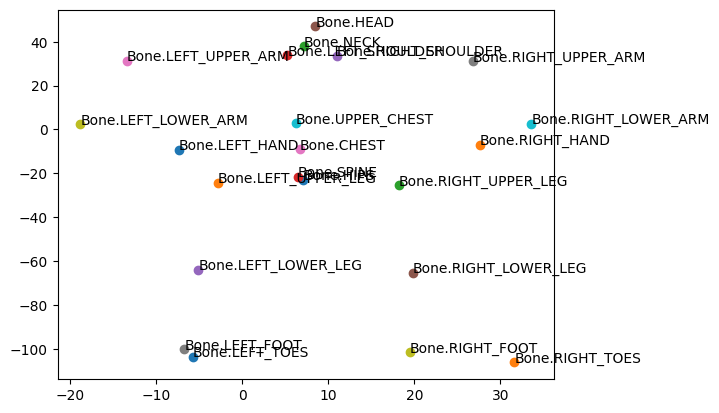

In [18]:

# 打印出映射好的关节图
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
for i in smpl_to_a2p_map:
    # get the index of the joint
    joint_postion = body_motion_0[0,smpl_to_a2p_map[i],0:2]
    joint_name = joint_names[smpl_to_a2p_map[i]]
    # draw point
    plt.scatter(joint_postion[0], joint_postion[1])
    plt.text(body_motion_0[0,smpl_to_a2p_map[i],0], body_motion_0[0,smpl_to_a2p_map[i],1], i)

导出骨骼位置

In [41]:
# 读取 body_motion_0.npy
import numpy as np
body_motion_0 = np.load('body_motions_0.npy')
print(body_motion_0.shape)

new_motions = np.zeros((len(body_motion_0),len(smpl_to_a2p_map),3))
# 映射成 smpl_to_a2p_map 里的数据，组成 [seq, 22, 3] 的矩阵
for i in range(len(body_motion_0)):
    for j in range(len(smpl_to_a2p_map_indexes)):
        for k in range(3):
            new_motions[i,j,k] = body_motion_0[i,smpl_to_a2p_map_indexes[j],k]

# 扩充一维成 [1, seq, 22, 3]
new_motions = np.expand_dims(new_motions, axis=0)
print(new_motions.shape)

# 保存成 npy
np.save('a2p_motions.npy', new_motions)



(960, 159, 8)
(1, 960, 22, 3)


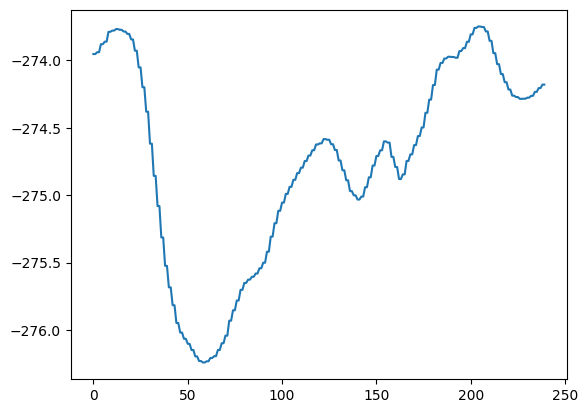

In [97]:
# 画出 new_motions 的变化曲线
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
# new_motion.shape = (1, T, 22, 3)
# 按T轴画出第一个关节的x轴变化曲线
# plt.plot(new_motions[0,:,0,0])
# y
# plt.plot(new_motions[0,:,0,1])
# z
plt.plot(new_motions[0,:,0,2])
plt.show()


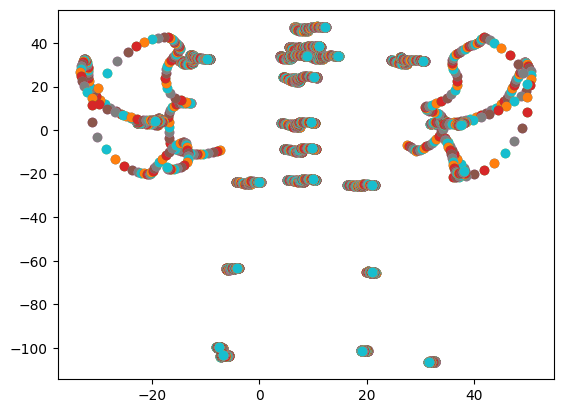

In [98]:
# 画出关节的变化范围
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
# new_motion.shape = (1, T, 22, 3)
for i in range(new_motions.shape[1]):
    plt.scatter(new_motions[0,i,:,0], new_motions[0,i,:,1])

计算骨骼旋转

(960, 159, 8)
(960, 22, 4)


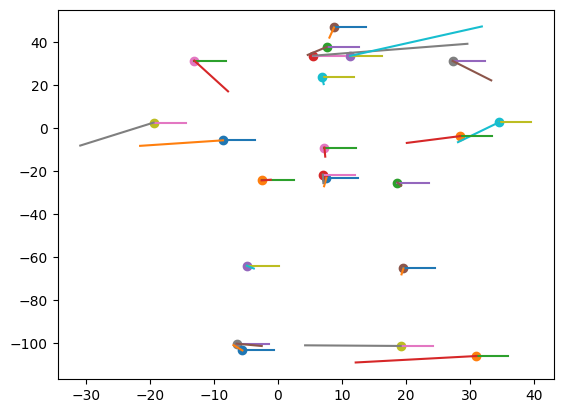

In [42]:
# 读取 body_motion_0.npy
import numpy as np
body_motion_0 = np.load('body_motions_0.npy')
print(body_motion_0.shape)

new_rotations = np.zeros((len(body_motion_0),len(smpl_to_a2p_map),4))
new_motions = np.zeros((len(body_motion_0),len(smpl_to_a2p_map),3))
# 映射成 smpl_to_a2p_map 里的数据，组成 [seq, 22, 4] 的四元数矩阵
for i in range(len(body_motion_0)):
    for j in range(len(smpl_to_a2p_map_indexes)):
        for k in range(4):
            new_rotations[i,j,k] = body_motion_0[i,smpl_to_a2p_map_indexes[j],k+3]
        for k in range(3):
            new_motions[i,j,k] = body_motion_0[i,smpl_to_a2p_map_indexes[j],k]
# 取一帧，画出关节的旋转
import matplotlib.pyplot as plt

# 画出第0帧的关节，带上关节名字
plt.figure()
# 先取出关节位置，作为起始点，画一条水平线
for i in range(new_motions.shape[1]):
    start_x = new_motions[0,i,0]
    start_y = new_motions[0,i,1]
    end_x = start_x + 5
    end_y = start_y
    plt.plot([start_x, end_x], [start_y, end_y])
    start_vector = np.array([end_x - start_x, end_y - start_y])
    # 旋转四元数
    rx, ry, rz, rw = new_rotations[0,i,:]
    # 计算 end_vector
    end_vector = quaternion_rotate(start_vector, rx, ry, rz, rw)*5
    # 画出 end_vector
    plt.plot([start_x, start_x + end_vector[0]], [start_y, start_y + end_vector[1]])


    plt.scatter(new_motions[0,i,0], new_motions[0,i,1])

# 保存成 npy
np.save('a2p_rotations.npy', new_rotations)
print(new_rotations.shape)


In [12]:
def  quaternion_rotate(start_vector, rx, ry, rz, rw):
    # 根据起始向量和旋转四元数，计算旋转后的向量，不依赖其他库
    # 如果 start_vector len 是 2，那么就补一个 0
    if len(start_vector) == 2:
        start_vector = np.concatenate([start_vector, [0]])
    start_vector = np.array(start_vector)
    # 先转成四元数
    start_vector = np.concatenate([start_vector, [0]])
    # 旋转四元数
    rotate_quaternion = np.array([rx, ry, rz, rw])
    # 旋转四元数的逆
    rotate_quaternion_inv = np.array([-rx, -ry, -rz, rw])
    # 旋转后的向量
    end_vector = quaternion_multiply(rotate_quaternion, start_vector)
    end_vector = quaternion_multiply(end_vector, rotate_quaternion_inv)
    # 取出前三个值
    end_vector = end_vector[:3]
    return end_vector

def quaternion_multiply(quaternion1, quaternion0):
    # 根据四元数相乘公式，计算四元数相乘，不依赖其他库
    w0, x0, y0, z0 = quaternion0
    w1, x1, y1, z1 = quaternion1
    return np.array([
        -x1 * x0 - y1 * y0 - z1 * z0 + w1 * w0,
        x1 * w0 + y1 * z0 - z1 * y0 + w1 * x0,
        -x1 * z0 + y1 * w0 + z1 * x0 + w1 * y0,
        x1 * y0 - y1 * x0 + z1 * w0 + w1 * z0])
